### Note: The Data is private and sensitive and cannot be shared. Therefore the cells are not executeable and only Readable.

### The aim of the project is to build a predictive model that can predict the time taken by the truck driver in covering the distance from Source to Destination with a certain degree of accuracy, given the following dataset.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR

In [3]:
df = pd.read_csv('dataset.csv')
df.shape

(52814, 49)

In [4]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,52804,52805,52806,52807,52808,52809,52810,52811,52812,52813
Plant,6930,6930,6930,6930,6930,6930,6930,6930,6930,6930,...,6930,6930,6930,6930,6930,6930,6930,6930,6930,6930
Plant Name,HOTGI,HOTGI,HOTGI,HOTGI,HOTGI,HOTGI,HOTGI,HOTGI,HOTGI,HOTGI,...,HOTGI,HOTGI,HOTGI,HOTGI,HOTGI,HOTGI,HOTGI,HOTGI,HOTGI,HOTGI
Trip ID,3243730,3240706,3302398,3239392,3239391,3240941,3242975,3242997,3243898,3241431,...,3224286,9156575,3321754,3323512,3323838,3219462,9154948,3312438,3227418,3244328
Trip Remark,GEOFENCE HIT,GEOFENCE HIT,GEOFENCE HIT,GEOFENCE HIT,GEOFENCE HIT,GEOFENCE HIT,GEOFENCE HIT,GEOFENCE HIT,DATA STRINGS <50 %,GEOFENCE HIT,...,GEOFENCE HIT,GEOFENCE HIT,DEV (0-15) km,DEV (15-25) km,HIGH ONWARD DISTANCE,DEV (25-40) km,DEV (0-15) km,DEV > than 40 km,HIGH ONWARD DISTANCE,HIGH ONWARD DISTANCE
Plant.1,6930-9301,6930-9301,6930-9301,6930-9301,6930-9301,6930-9301,6930-9301,6930-9301,6930-9301,6930-9301,...,6930-9301,6930-9301,6930-9301,6930-9301,6930-9301,6930-9301,6930-9301,6930-9301,6930-9301,6930-9301
Vehicle Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Bag,Bag,Bag,Bag,NaN,Bag,Bag,NaN,NaN
Source Location,HOTGI CEMENT WORKS-BS HOTGI MAIN,HOTGI CEMENT WORKS-BS HOTGI MAIN,HOTGI CEMENT WORKS-BS HOTGI MAIN,HOTGI CEMENT WORKS-BS HOTGI MAIN,HOTGI CEMENT WORKS-BS HOTGI MAIN,HOTGI CEMENT WORKS-BS HOTGI MAIN,HOTGI CEMENT WORKS-BS HOTGI MAIN,HOTGI CEMENT WORKS-BS HOTGI MAIN,HOTGI CEMENT WORKS-BS HOTGI MAIN,HOTGI CEMENT WORKS-BS HOTGI MAIN,...,HOTGI CEMENT WORKS-BS HOTGI MAIN,HOTGI CEMENT WORKS-BS HOTGI MAIN,HOTGI CEMENT WORKS-BS HOTGI MAIN,HOTGI CEMENT WORKS-BS HOTGI MAIN,HOTGI CEMENT WORKS-BS HOTGI MAIN,HOTGI CEMENT WORKS-BS HOTGI MAIN,HOTGI CEMENT WORKS-BS HOTGI MAIN,HOTGI CEMENT WORKS-BS HOTGI MAIN,HOTGI CEMENT WORKS-BS HOTGI MAIN,HOTGI CEMENT WORKS-BS HOTGI MAIN
Incoterm,NaN,NaN,FRC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,-,FRC,FRC,NaN,NaN,-,FRC,NaN,NaN
Transporter Name,CHOUDHARY FREIGHT CARRIER,SATGURU CARRIERS,CHOUDHARY FREIGHT CARRIER,SATGURU CARRIERS,SATGURU CARRIERS,SATGURU CARRIERS,SATGURU CARRIERS,SATGURU CARRIERS,CHOUDHARY FREIGHT CARRIER,KANSE ENTERPRISES PVT LTD,...,SATGURU CARRIERS,PARDEEP ROADWAYS,SAI TRADERS,RAISONI HUNDEKARI,SATGURU CARRIERS,SATGURU CARRIERS,PARDEEP ROADWAYS,RAISONI HUNDEKARI,SATGURU CARRIERS,SATGURU CARRIERS
Transporter Code,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.30348e+06,2.30572e+06,2.30401e+06,2.30219e+06,NaN,2.30348e+06,NaN,NaN,NaN


In [5]:
df.columns

Index(['Plant', 'Plant Name', 'Trip ID', 'Trip Remark', 'Plant.1',
       'Vehicle Type', 'Source Location', 'Incoterm', 'Transporter Name',
       'Transporter Code', 'Vehicle', 'Customer Segment', 'Customer Name',
       'Quantity(MT)', 'Depot', 'Destination', 'City Code',
       'Actual Unloading Location', 'SAP Lead Distance (Kms)',
       'Onward Distance (Kms)', 'Return Distance (kms)',
       'Total Distance (Kms)', 'Lead Deviation Distance',
       'Destination Deviation', 'Customer ID', 'Route Hit %', 'Route Missed %',
       'Way Point Count', 'Speed Violation Count', 'Plant Exit Time',
       'Customer Reach Time', 'Customer Exit Time', 'Trip End Time',
       'Onwards Travel Duration(Hrs.Mins)', 'Return Travel Duration(Hrs.Mins)',
       'Total Travel Duration(Hrs.Mins)', 'Idle Time(At Cust Loc.)',
       'Trip Speed', 'Towards Customer Idle(Hrs.Mins)',
       'Idling Return To Plant(Hrs.Mins)', 'Total Idle(Hrs.Mins)',
       'Delivery Date/Time', 'Customer Requested Window

* Looking at the columns individually

In [6]:
df['Plant'].value_counts()

6930    52787
6935       27
Name: Plant, dtype: int64

In [7]:
df['Plant Name'].value_counts()

HOTGI    52814
Name: Plant Name, dtype: int64

In [8]:
df['Plant.1'].value_counts()

6930-9301    52787
6935-9351       27
Name: Plant.1, dtype: int64

In [9]:
df['Source Location'].value_counts()

HOTGI CEMENT WORKS-BS HOTGI MAIN              52787
HOTGI CEMENT WORKS - U-II-BS HOTGI MAIN-II       27
Name: Source Location, dtype: int64

### We can see clearly that Plant, Plant.1, Source Location, display the same information. Also for all four of them it's a single value for most of the dataset. This means that all travel is happening from the same source location!

#### Now this means that these columns don't add any information so we can safely remove them

In [10]:
df.drop(columns = ['Plant', 'Plant.1', 'Source Location', 'Plant Name'], axis = 1, inplace = True)

In [11]:
df.columns

Index(['Trip ID', 'Trip Remark', 'Vehicle Type', 'Incoterm',
       'Transporter Name', 'Transporter Code', 'Vehicle', 'Customer Segment',
       'Customer Name', 'Quantity(MT)', 'Depot', 'Destination', 'City Code',
       'Actual Unloading Location', 'SAP Lead Distance (Kms)',
       'Onward Distance (Kms)', 'Return Distance (kms)',
       'Total Distance (Kms)', 'Lead Deviation Distance',
       'Destination Deviation', 'Customer ID', 'Route Hit %', 'Route Missed %',
       'Way Point Count', 'Speed Violation Count', 'Plant Exit Time',
       'Customer Reach Time', 'Customer Exit Time', 'Trip End Time',
       'Onwards Travel Duration(Hrs.Mins)', 'Return Travel Duration(Hrs.Mins)',
       'Total Travel Duration(Hrs.Mins)', 'Idle Time(At Cust Loc.)',
       'Trip Speed', 'Towards Customer Idle(Hrs.Mins)',
       'Idling Return To Plant(Hrs.Mins)', 'Total Idle(Hrs.Mins)',
       'Delivery Date/Time', 'Customer Requested Window', 'Compliance Status',
       'Zone Name', 'Lead Time(Hr:Mi

In [12]:
df['Vehicle Type'].value_counts()

Bag     19000
BAG      1375
Bulk     1266
BULK      630
2515       68
Name: Vehicle Type, dtype: int64

In [13]:
df['Vehicle Type'].isnull().sum()

30475

> * Here we can observe that Vehicle Type has only two types of values essentially, bag and bulk. The total sum of not available values are around 30475

In [14]:
df['Trip ID'].value_counts()

3246045    4
9112985    4
9110681    4
3245891    4
9123521    4
9095837    4
9122444    4
3246102    4
9127519    4
3246038    4
9138526    4
9135989    4
9133640    4
9133600    4
9123381    4
9127557    4
9114563    4
9106355    4
3246129    4
3246099    4
9120219    4
9138525    4
3301565    3
3246220    3
3227401    3
3326847    3
3312894    3
3246117    3
3246048    3
3246095    3
          ..
3224460    1
9112459    1
9114504    1
3242885    1
3320703    1
3326898    1
3314616    1
3316665    1
3273684    1
3296227    1
9198561    1
3298272    1
9153503    1
3247067    1
3245018    1
3251161    1
3271639    1
3269590    1
3263443    1
3312571    1
3222479    1
3220430    1
9116617    1
3238855    1
3240900    1
9128899    1
3320767    1
3318718    1
3322812    1
9177089    1
Name: Trip ID, Length: 51669, dtype: int64

> * Trip ID as we can understand intuitively is highly distribuited and barely repeats

In [15]:
pd.set_option('display.max_columns', 100)
df.describe()

,Trip ID,Transporter Code,Quantity(MT),Depot,SAP Lead Distance (Kms),Onward Distance (Kms),Return Distance (kms),Total Distance (Kms),Lead Deviation Distance,Destination Deviation,Route Hit %,Route Missed %,Way Point Count,Speed Violation Count,Onwards Travel Duration(Hrs.Mins),Return Travel Duration(Hrs.Mins),Total Travel Duration(Hrs.Mins),Idle Time(At Cust Loc.),Trip Speed,Towards Customer Idle(Hrs.Mins),Idling Return To Plant(Hrs.Mins),Total Idle(Hrs.Mins),Lead Time(Hr:Min)
count,5.281400e+04,1.020000e+04,52814.000000,52814.000000,52814.000000,52814.000000,5.281400e+04,5.281400e+04,52814.000000,15665.000000,25352.000000,29472.000000,52814.000000,35673.000000,52814.000000,52814.000000,52814.000000,52814.000000,5.281400e+04,52814.000000,52814.000000,52814.000000,52814.000000
mean,4.029967e+06,2.302097e+06,19.785924,6315.446264,200.604442,192.935148,2.105009e+05,2.117763e+05,7.669294,18.074392,35.632928,69.563620,5.348714,0.153758,17.328222,25.006841,50.300723,6.167084,6.344221e+03,11.154434,17.019500,36.259849,20.381333
std,1.954384e+06,1.404986e+03,4.661922,5.331435,91.441348,95.744376,3.356867e+07,3.356872e+07,29.180417,30.383903,14.731468,18.252296,6.488984,0.932091,16.642576,36.971150,46.346480,14.123120,1.028571e+06,15.920505,33.567489,42.507869,19.942453
min,3.219392e+06,2.300395e+06,0.060000,6301.000000,5.000000,2.730000,0.000000e+00,4.950000e+00,-733.750000,0.000000,4.000000,13.000000,0.000000,0.000000,0.110000,-9.510000,0.180000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,3.264205e+06,2.300395e+06,17.000000,6313.000000,168.000000,147.990000,1.487625e+02,3.118150e+02,-3.510000,6.350000,25.000000,57.000000,0.000000,0.000000,7.580000,7.590000,22.040000,0.000000,8.000000e+00,1.330000,1.150000,10.540000,9.180000
50%,3.299338e+06,2.302186e+06,21.000000,6316.000000,210.000000,206.725000,2.114150e+02,4.255700e+02,5.470000,12.000000,33.000000,70.000000,3.000000,0.000000,11.550000,12.420000,40.250000,2.030000,1.200000e+01,5.410000,5.230000,26.210000,16.260000
75%,3.320636e+06,2.302233e+06,21.000000,6317.000000,245.000000,246.700000,2.504675e+02,5.031200e+02,15.370000,20.790000,45.000000,80.000000,10.000000,0.000000,24.380000,28.530000,62.020000,5.300000,1.900000e+01,16.380000,20.230000,45.310000,25.000000
max,9.203983e+06,2.306187e+06,30.000000,6327.000000,550.000000,1172.750000,5.455137e+09,5.455137e+09,286.350000,769.420000,100.000000,160.000000,30.000000,38.000000,448.520000,1120.330000,1182.500000,533.050000,2.016686e+08,426.150000,772.110000,827.150000,439.000000


In [16]:
df['Incoterm'].value_counts()

FRC    16050
-       2496
EXC       75
FRU        1
Name: Incoterm, dtype: int64

> * There are a lot of missing values present. In these values too the data is heavily skewed

### Converting hour:mins into mins

In [17]:
import decimal
def convert_to_min(col):
    
    new_col = [] 
    for value in col.astype('float64').values:
        hr, mins = format(value, '.2f').split('.')
        hr_to_mins = int(hr) * 60
        f_mins = int(decimal.Decimal(mins))
        total_time_in_mins = hr_to_mins + f_mins
        new_col.append(total_time_in_mins)
        
    return new_col

In [18]:
df['Lead Time(Mins)'] = convert_to_min(df['Lead Time(Hr:Min)'])
df['Return Travel Duration(Mins)'] = convert_to_min(df['Return Travel Duration(Hrs.Mins)'])
df['Total Travel Duration(Mins)'] = convert_to_min(df['Total Travel Duration(Hrs.Mins)'])
df['Towards Customer Idle(Mins)'] = convert_to_min(df['Towards Customer Idle(Hrs.Mins)'])
df['Idling Return To Plant(Mins)'] = convert_to_min(df['Idling Return To Plant(Hrs.Mins)'])
df['Onwards Travel Duration(Mins)'] = convert_to_min(df['Onwards Travel Duration(Hrs.Mins)'])
df['Total Idle(Mins)'] = convert_to_min(df['Total Idle(Hrs.Mins)'])

df.drop(columns = ['Return Travel Duration(Hrs.Mins)','Total Travel Duration(Hrs.Mins)',
                   'Towards Customer Idle(Hrs.Mins)', 'Idling Return To Plant(Hrs.Mins)',
                   'Total Idle(Hrs.Mins)', 'Onwards Travel Duration(Hrs.Mins)',
                  'Lead Time(Hr:Min)'], axis = 1, inplace = True)

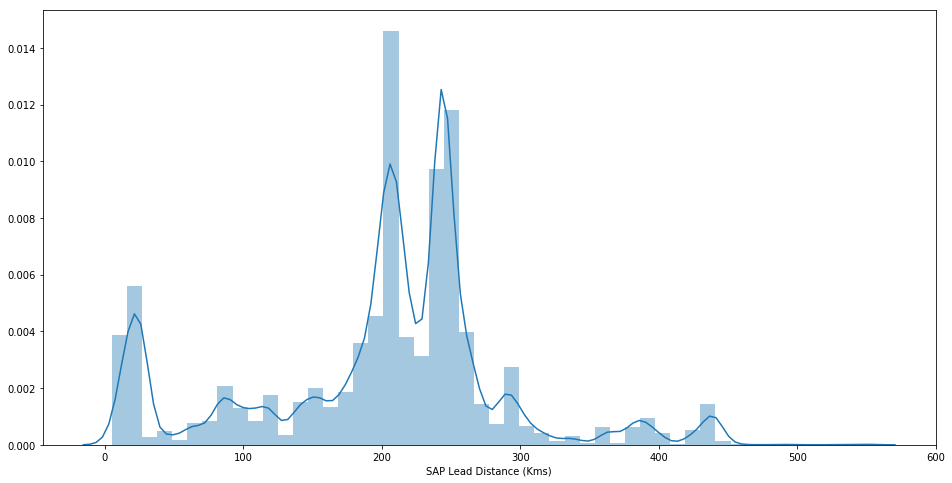

In [19]:
plt.figure(figsize = (16, 8))
sns.distplot(df['SAP Lead Distance (Kms)'])
plt.show()

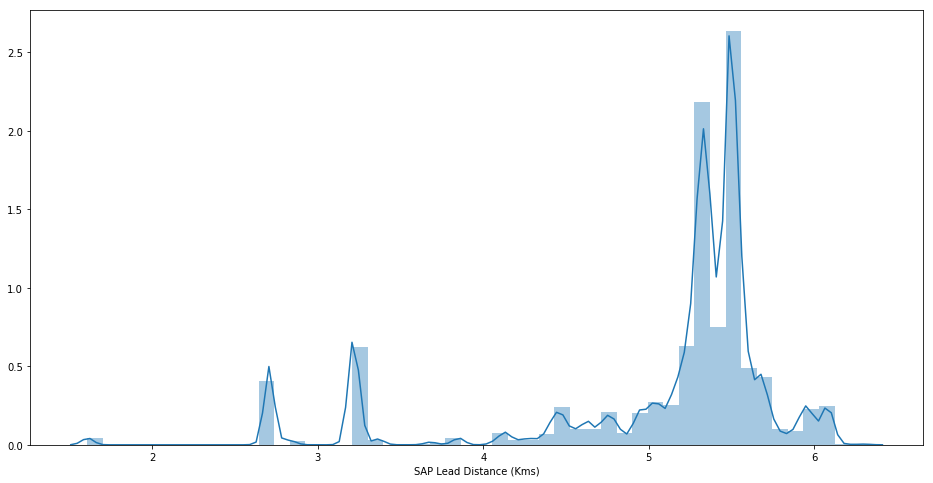

In [25]:
plt.figure(figsize = (16, 8))
sns.distplot(df['SAP Lead Distance (Kms)'].apply(np.log))
plt.show()

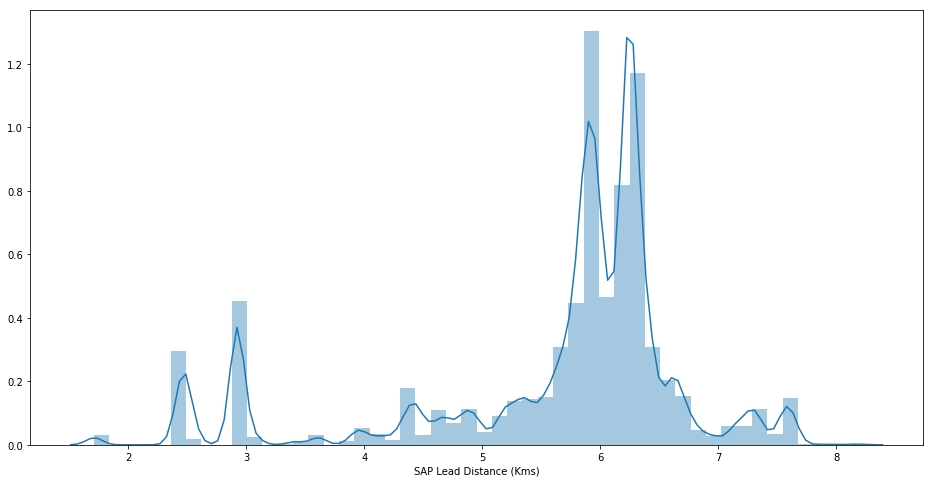

In [27]:
plt.figure(figsize = (16, 8))
sns.distplot(df['SAP Lead Distance (Kms)'].apply(np.cbrt))
plt.show()

## Removing if there are Column Duplicates if any

### Looking at Transporter

In [36]:
df.groupby(['Transporter Name', 'Transporter Code'])['Onwards Travel Duration(Hrs.Mins)'].describe()

,,count,mean,std,min,25%,50%,75%,max
Transporter Name,Transporter Code,,,,,,,,
BASVESHWAR CEMENT TRADING CO,2306086.0,75.0,14.180800,11.346676,4.42,8.2400,10.090,13.2050,62.17
CHOUDHARY FREIGHT CARRIER,2300395.0,1528.0,23.032258,21.494151,1.06,9.2900,14.530,31.2125,202.24
CHOUDHARY FREIGHT CORPORATION,2300395.0,629.0,19.089269,13.838819,1.21,10.3400,15.140,25.0100,186.16
CHOWDHARY FREIGHT CORPORATION,2300395.0,508.0,22.405020,16.411190,1.06,10.0900,17.330,30.5050,97.07
DEV ROADWAYS,2302230.0,1157.0,17.324831,13.933436,0.24,7.3000,13.000,26.2400,148.41
JAY BHAVANI TRADERS,2305726.0,52.0,16.125962,9.440844,6.43,10.2625,12.805,15.0400,39.21
JAY BHAWANI TRADERS,2305726.0,9.0,18.715556,13.672129,12.25,14.1100,14.200,15.0700,55.09
KANSE ENTERPRISES PVT LTD,2302143.0,649.0,10.611233,10.123938,0.21,4.2100,8.090,12.5200,85.42
NAVRANG TRADERS,2305727.0,115.0,10.978522,4.279323,5.20,8.4200,10.090,12.2150,34.01


In [37]:
df['Transporter Name'].isnull().sum()

0

In [38]:
df['Transporter Code'].isnull().sum()

42614

### As we can see, Transporter name has a one is to one relationship with Transporter Code. But Transporter Code has a lot more null values than Transporter Name. So we remove that

In [39]:
df.drop(columns = ['Transporter Code'], axis =1, inplace = True)

### Checking the same for city code and Destination

In [40]:
df.groupby(['Destination', 'City Code'])['Onwards Travel Duration(Hrs.Mins)'].describe()

,,count,mean,std,min,25%,50%,75%,max
Destination,City Code,,,,,,,,
ABDULLAT ( KLP ),MA06,2.0,11.135000,0.063640,11.09,11.1125,11.135,11.1575,11.18
ADARKI,MA10,47.0,13.327447,7.891701,7.06,9.2700,11.150,13.1850,48.20
ADAS,MA11,13.0,12.784615,8.174832,6.42,7.5400,11.170,12.2400,35.39
AGOTI,MA23,4.0,12.002500,3.737418,7.36,10.2550,12.175,13.9225,16.30
AHEMADPUR,MA24,191.0,22.552827,9.492690,5.59,13.9250,26.270,29.0250,56.14
AIROLI,MA34,1.0,58.290000,NaN,58.29,58.2900,58.290,58.2900,58.29
AITAVADE KH,MAM1,2.0,25.900000,15.103801,15.22,20.5600,25.900,31.2400,36.58
AJARA,MA35,21.0,41.320476,17.275540,11.54,35.4500,37.370,42.3200,84.45
AKKALKOT,MA40,89.0,8.583034,9.785210,1.27,2.2400,5.360,9.0600,62.41


In [41]:
df['City Code'].isnull().sum()

0

In [42]:
df['Destination'].isnull().sum()

0

### Let us Drop Destination

In [43]:
df.drop(columns = ['Destination'], axis = 1, inplace = True)

### Now Customer Name and Customer ID

In [45]:
df.groupby(['Customer Name', 'Customer ID'])['Onwards Travel Duration(Hrs.Mins)'].describe()

count       mean  \
Customer Name                       Customer ID                       
-                                   630208M042       3.0  11.410000   
                                    630313S207       2.0  12.325000   
                                    630314V032       2.0  29.490000   
                                    630316S109       5.0  11.786000   
                                    630316V016       1.0  11.300000   
                                    630525M079       1.0  11.240000   
                                    630526S155       1.0  18.410000   
                                    ABG           7795.0  14.214881   
A B CONSTRUCTION AND DEVELOPERS     630317A060       1.0   7.570000   
A B PADMASHALI DHARMASHALA PANDHARP 630313A076       3.0   5.786667   
A.N.TRADERS(ST)                     630527A001      13.0  29.514615   
AARYA INFRASTRUCTURES RMC           630317A041       3.0  16.563333   
AARYAN DEVCON PVT.LTD.              630102A029       1.0  42.460000   
AASTHA INFRA BUILDCON               630208A028       2.0  27.375000   
ABA JAGANNATH KARANDE               630313A085       6.0   8.561667   
ABB INDIA LIMITED                   630314A045      20.0  18.197500   
ABG                                 ABG          11774.0  12.746835   
ABHAYSINHA BALASAHEB GHOLKAR        630313A082       2.0   5.795000   
ABHIJEET TRADING COMPANY            630317A001       8.0  14.733750   
ABHISHRI ENTERPRISES                630313A050       4.0   7.227500   
AC and JDP JOINT VENTURE            630313A043       6.0   5.056667   
ACON PROJECTS                       630314A059      14.0  14.835714   
ADITYA ENTERPRISES                  630317A056       2.0  23.300000   
ADITYA IRRIGATERS                   630313A071       1.0  33.450000   
AGRAWAL AGENCIES                    630313A067       3.0  17.360000   
AGRICULTURAL DEVELOPMENT TRUST      630207A084       8.0  17.968750   
AHMED B.ZAKARIA  SONS P.LTD         630101A001       1.0  30.300000   
AHMED B.ZAKARIA SONS P.LTD          630101A001       1.0  41.040000   
AHUJA ENTERPRISES                   630316A008     236.0  33.652161   
AJANTHA ENTERPRISES                 630316A002     111.0  18.689369   
AJIT BUILDERS AND DEVOLPERS         630316A021       3.0  16.806667   
AJIT TRADERS                        630317A002     310.0  13.490194   
AJIT TRADERS(ABC)                   630317A012       8.0  15.071250   
AJWANI INFRASTRUCTURE PRIVATE       630207A011       1.0  22.200000   
AKKALKOT EDUCATION SOCIETY          630313A087      11.0   8.620909   
ALANKAR SALES                       630207A001      75.0  13.555200   
ALANKAR SALES (BCC)                 630207A051      55.0  14.860364   
ALANKAR STEEL CENTRE                630317A028      40.0  14.077000   
ALOK INFRAMATE PRIVATE LIMITED      630207A151       2.0   9.740000   
AMAR ENTERPRISES                    630526A005       3.0  21.923333   
AMBIKA ENTERPRISES                  630317A003       6.0  10.358333   
AMIT ENTERPRISES HOUSING LTD        630207A116       7.0  16.181429   
AMIT TRADERS                        630525A083      46.0  17.615435   
AMOL TRADERS                        630317A045       3.0  21.340000   
ANAND AGENCIES                      630525A007      92.0  18.474891   
ANAND CONSTRUWELL PVT LTD           630527A020       1.0  68.530000   
ANAND SALES CORPORATION             630527A006       1.0   7.330000   
ANANT TRADING CORPN.                630314A003      20.0  33.649500   
ANKITA ENTERPRISES UBS              630313A065       2.0   6.435000   
ANKUR SHOPPE PVT LTD                630103A001       1.0  58.290000   
...                                                  ...        ...   
VENUGOPAL AND MIZAN TRADERS         630314V023      16.0  44.561875   
VERTEX NEWTON PROJECTS PVT LTD      630103V039       3.0  34.403333   
VICKY P VHANSURE                    630313V026       4.0   1.860000   
VIJAY TRADERS(STK)                  630526V029      14.0  23.994286   
VIJA

### As we can see, there are missing values in Customer Name which is represented by '-' but otherwise Customer Name and Customer ID are the same. We can drop Customer Name and go with Customer ID in the Dataset.

In [46]:
df.drop(columns = ['Customer Name'], axis = 1, inplace = True)

## Now after checking for Column duplicates, we check for Row duplicates..

In [53]:
this_df = df.groupby(['Vehicle','Onward Distance (Kms)', 'City Code', 'Plant Exit Time'])['Onwards Travel Duration(Mins)'].describe()
this_df[this_df['count'] > 1]

count    mean  \
Vehicle    Onward Distance (Kms) City Code Plant Exit Time                   
KA01AD5636 464.29                MY18      10/20/2017 20:40    2.0  5160.0   
           583.58                MC37      12/2/2017 21:04     2.0  3913.0   
MH04AL6056 285.15                MH35      10/21/2016 19:31    2.0   940.0   
MH04AL6057 286.92                MP95      10/19/2016 20:10    2.0  3166.0   
MH04AL6225 32.12                 M9F2      10/24/2016 4:14     2.0   139.0   
           54.78                 MDE3      7/15/2017 23:27     2.0   514.0   
           68.57                 MKI6      8/16/2017 21:58     2.0   763.0   
           81.42                 MY07      8/8/2017 20:19      2.0   808.0   
           85.85                 MN57      11/29/2017 1:50     4.0   595.0   
           91.08                 MKU1      7/9/2017 0:11       2.0   561.0   
           137.12                MK90      10/14/2017 0:06     2.0   582.0   
MH04AL6227 90.91                 MG93      05:40.0             2.0  1729.0   
MH04AL6254 318.39                MC07      10/22/2016 21:37    4.0  2229.0   
MH04AL7627 4.84                  MH47      11/8/2017 0:54      2.0   632.0   
           16.01                 MV15      9/2/2017 1:13       2.0  2016.0   
           32.38                 MW25      9/12/2017 0:07      2.0  2016.0   
           32.90                 MDE3      10/25/2017 2:07     2.0   477.0   
           34.76                 MW25      11/26/2017 2:18     4.0  3408.0   
           38.11                 MH50      11/11/2017 2:11     2.0  5142.0   
           41.25                 MW25      12/12/2017 0:42     2.0  1974.0   
           46.79                 MW25      10/7/2017 2:44      2.0   686.0   
           54.35                 MW25      10/26/2017 1:56     2.0   669.0   
           56.95                 MDE3      8/17/2017 0:58      2.0   525.0   
           64.83                 MDE3      11/5/2016 5:03      2.0  2121.0   
           127.26                MW66      10/21/2016 2:19     2.0   439.0   
           132.09                MDE3      8/14/2017 0:58      2.0   909.0   
MH04AL8301 36.52                 MKO1      10/22/2016 20:33    2.0   204.0   
           178.28                MM88      10/20/2016 4:06     2.0  1732.0   
           312.95                MSM3      10/23/2016 19:18    2.0  2238.0   
MH04AL9049 30.15                 MK17      10/24/2016 4:57     3.0   111.0   
           33.30                 MDE3      39:08.0             2.0   314.0   
           58.23                 MDE3      8/31/2017 13:25     2.0  1212.0   
           77.02                 MY11      8/1/2017 4:41       2.0   276.0   
           83.00                 MT22      7/5/2016 17:37      2.0  1039.0   
           101.51                MT22      1/16/2017 4:53      2.0   744.0   
MH04BG0519 271.23                MH35      10/21/2016 19:29    2.0   545.0   
MH04CP4098 88.47                 MY07      6/18/2017 5:13      2.0   416.0   
           186.38                MP35      5/16/2017 0:16      2.0  1938.0   
MH04CP4443 103.41                MO06      10/18/2016 20:36    2.0  1175.0   
MH04CU9401 27.28                 MT04      11/11/2017 1:49     2.0   479.0   
           32.32                 MDE3      9/11/2017 1:53      2.0  1822.0   
           33.25                 MH50      12/6/2017 4:07      2.0   375.0   
           47.56                 MDE3      6/27/2017 10:40     2.0   263.0   
           49.50                 MH50      41:57.0             2.0  1710.0   
           54.10                 MK17      5/30/2017 10:12     2.0  1613.0   
           62.42                 MDE3      7/25/2017 4:55      2.0   522.0   
           85.41                 MT92      5/23/2017 4:00      2.0  1682.0   
           87.11                 MY07      7/26/2017 8:11      2.0  1590.0   
           90.06                 MBB4      7/5/2017 9:08       2.0  1647.0   
           113.69                MN57      12/8/2017 3:05      2.0   534.0   
...  

In [54]:
this_df[(this_df['count'] > 1)& (this_df['std'] == 0) ]

count    mean  \
Vehicle    Onward Distance (Kms) City Code Plant Exit Time                   
KA01AD5636 464.29                MY18      10/20/2017 20:40    2.0  5160.0   
           583.58                MC37      12/2/2017 21:04     2.0  3913.0   
MH04AL6056 285.15                MH35      10/21/2016 19:31    2.0   940.0   
MH04AL6057 286.92                MP95      10/19/2016 20:10    2.0  3166.0   
MH04AL6225 32.12                 M9F2      10/24/2016 4:14     2.0   139.0   
           54.78                 MDE3      7/15/2017 23:27     2.0   514.0   
           68.57                 MKI6      8/16/2017 21:58     2.0   763.0   
           81.42                 MY07      8/8/2017 20:19      2.0   808.0   
           85.85                 MN57      11/29/2017 1:50     4.0   595.0   
           91.08                 MKU1      7/9/2017 0:11       2.0   561.0   
           137.12                MK90      10/14/2017 0:06     2.0   582.0   
MH04AL6227 90.91                 MG93      05:40.0             2.0  1729.0   
MH04AL6254 318.39                MC07      10/22/2016 21:37    4.0  2229.0   
MH04AL7627 4.84                  MH47      11/8/2017 0:54      2.0   632.0   
           16.01                 MV15      9/2/2017 1:13       2.0  2016.0   
           32.38                 MW25      9/12/2017 0:07      2.0  2016.0   
           32.90                 MDE3      10/25/2017 2:07     2.0   477.0   
           34.76                 MW25      11/26/2017 2:18     4.0  3408.0   
           38.11                 MH50      11/11/2017 2:11     2.0  5142.0   
           41.25                 MW25      12/12/2017 0:42     2.0  1974.0   
           46.79                 MW25      10/7/2017 2:44      2.0   686.0   
           54.35                 MW25      10/26/2017 1:56     2.0   669.0   
           56.95                 MDE3      8/17/2017 0:58      2.0   525.0   
           64.83                 MDE3      11/5/2016 5:03      2.0  2121.0   
           127.26                MW66      10/21/2016 2:19     2.0   439.0   
           132.09                MDE3      8/14/2017 0:58      2.0   909.0   
MH04AL8301 36.52                 MKO1      10/22/2016 20:33    2.0   204.0   
           178.28                MM88      10/20/2016 4:06     2.0  1732.0   
           312.95                MSM3      10/23/2016 19:18    2.0  2238.0   
MH04AL9049 30.15                 MK17      10/24/2016 4:57     3.0   111.0   
           33.30                 MDE3      39:08.0             2.0   314.0   
           58.23                 MDE3      8/31/2017 13:25     2.0  1212.0   
           77.02                 MY11      8/1/2017 4:41       2.0   276.0   
           83.00                 MT22      7/5/2016 17:37      2.0  1039.0   
           101.51                MT22      1/16/2017 4:53      2.0   744.0   
MH04BG0519 271.23                MH35      10/21/2016 19:29    2.0   545.0   
MH04CP4098 88.47                 MY07      6/18/2017 5:13      2.0   416.0   
           186.38                MP35      5/16/2017 0:16      2.0  1938.0   
MH04CP4443 103.41                MO06      10/18/2016 20:36    2.0  1175.0   
MH04CU9401 27.28                 MT04      11/11/2017 1:49     2.0   479.0   
           32.32                 MDE3      9/11/2017 1:53      2.0  1822.0   
           33.25                 MH50      12/6/2017 4:07      2.0   375.0   
           47.56                 MDE3      6/27/2017 10:40     2.0   263.0   
           49.50                 MH50      41:57.0             2.0  1710.0   
           54.10                 MK17      5/30/2017 10:12     2.0  1613.0   
           62.42                 MDE3      7/25/2017 4:55      2.0   522.0   
           85.41                 MT92      5/23/2017 4:00      2.0  1682.0   
           87.11                 MY07      7/26/2017 8:11      2.0  1590.0   
           90.06                 MBB4      7/5/2017 9:08       2.0  1647.0   
           113.69                MN57      12/8/2017 3:05      2.0   534.0   
...  

### Duplicate Rows??! Let's investigate

In [55]:
pd.set_option('max_columns', 500)
df[(df['Vehicle'] == 'MH04AL6225')& (df['Onward Distance (Kms)'] == 85.85)]

,Trip ID,Trip Remark,Vehicle Type,Incoterm,Transporter Name,Vehicle,Customer Segment,Quantity(MT),Depot,City Code,Actual Unloading Location,SAP Lead Distance (Kms),Onward Distance (Kms),Return Distance (kms),Total Distance (Kms),Lead Deviation Distance,Destination Deviation,Customer ID,Route Hit %,Route Missed %,Way Point Count,Speed Violation Count,Plant Exit Time,Customer Reach Time,Customer Exit Time,Trip End Time,Idle Time(At Cust Loc.),Trip Speed,Delivery Date/Time,Customer Requested Window,Compliance Status,Zone Name,Actual Device Installation date and time,Device Type,Vehicle Status,Lead Time(Mins),Return Travel Duration(Mins),Total Travel Duration(Mins),Towards Customer Idle(Mins),Idling Return To Plant(Mins),Onwards Travel Duration(Mins),Total Idle(Mins)
20474,9133600,DEV > than 40 km,Bulk,FRC,SATGURU CARRIERS,MH04AL6225,TRADE,7.0,6313,MN57,IN ANDUR OSMANABAD DISTRICT DIST. MAHARASHTR...,118,85.85,56.75,143.46,32.15,40.77,630313S008,NaN,NaN,0,0.0,11/29/2017 1:50,11/29/2017 11:45,11/29/2017 13:00,11/29/2017 15:17,2.29,11.76,11/29/2017 11:45,Working Hours1 (9AM - 1PM),HIT,WEST-A,5/31/2009 0:00,NVT3,Intransit,601,137,807,854,20,595,1023
20475,9133600,DEV > than 40 km,Bulk,FRC,SATGURU CARRIERS,MH04AL6225,TRADE,7.0,6313,MN57,IN ANDUR OSMANABAD DISTRICT DIST. MAHARASHTR...,118,85.85,56.75,143.46,32.15,40.77,630313S008,NaN,NaN,0,0.0,11/29/2017 1:50,11/29/2017 11:45,11/29/2017 13:00,11/29/2017 15:17,2.29,11.76,11/29/2017 11:45,Working Hours1 (9AM - 1PM),HIT,WEST-A,5/31/2009 0:00,NVT3,Intransit,601,137,807,854,20,595,1023
20476,9133600,DEV > than 40 km,Bulk,FRC,SATGURU CARRIERS,MH04AL6225,TRADE,10.0,6313,MN57,IN ANDUR OSMANABAD DISTRICT DIST. MAHARASHTR...,118,85.85,56.75,143.46,32.15,40.77,630313S008,NaN,NaN,0,0.0,11/29/2017 1:50,11/29/2017 11:45,11/29/2017 13:00,11/29/2017 15:17,2.29,11.76,11/29/2017 11:45,Working Hours1 (9AM - 1PM),HIT,WEST-A,5/31/2009 0:00,NVT3,Intransit,601,137,807,854,20,595,1023
20477,9133600,DEV > than 40 km,Bulk,FRC,SATGURU CARRIERS,MH04AL6225,TRADE,10.0,6313,MN57,IN ANDUR OSMANABAD DISTRICT DIST. MAHARASHTR...,118,85.85,56.75,143.46,32.15,40.77,630313S008,NaN,NaN,0,0.0,11/29/2017 1:50,11/29/2017 11:45,11/29/2017 13:00,11/29/2017 15:17,2.29,11.76,11/29/2017 11:45,Working Hours1 (9AM - 1PM),HIT,WEST-A,5/31/2009 0:00,NVT3,Intransit,601,137,807,854,20,595,1023


In [56]:
df_new = df.drop_duplicates()

In [57]:
new_this_df = df_new.groupby(['Vehicle','Onward Distance (Kms)', 'City Code', 'Plant Exit Time'])['Onwards Travel Duration(Mins)'].describe()
new_this_df[(new_this_df['count'] > 1)& (new_this_df['std'] == 0)]

count    mean  \
Vehicle    Onward Distance (Kms) City Code Plant Exit Time                   
KA01AD5636 464.29                MY18      10/20/2017 20:40    2.0  5160.0   
           583.58                MC37      12/2/2017 21:04     2.0  3913.0   
MH04AL6225 54.78                 MDE3      7/15/2017 23:27     2.0   514.0   
           68.57                 MKI6      8/16/2017 21:58     2.0   763.0   
           81.42                 MY07      8/8/2017 20:19      2.0   808.0   
           85.85                 MN57      11/29/2017 1:50     2.0   595.0   
           91.08                 MKU1      7/9/2017 0:11       2.0   561.0   
           137.12                MK90      10/14/2017 0:06     2.0   582.0   
MH04AL6227 90.91                 MG93      05:40.0             2.0  1729.0   
MH04AL7627 4.84                  MH47      11/8/2017 0:54      2.0   632.0   
           16.01                 MV15      9/2/2017 1:13       2.0  2016.0   
           32.38                 MW25      9/12/2017 0:07      2.0  2016.0   
           32.90                 MDE3      10/25/2017 2:07     2.0   477.0   
           34.76                 MW25      11/26/2017 2:18     2.0  3408.0   
           38.11                 MH50      11/11/2017 2:11     2.0  5142.0   
           41.25                 MW25      12/12/2017 0:42     2.0  1974.0   
           46.79                 MW25      10/7/2017 2:44      2.0   686.0   
           54.35                 MW25      10/26/2017 1:56     2.0   669.0   
           56.95                 MDE3      8/17/2017 0:58      2.0   525.0   
           64.83                 MDE3      11/5/2016 5:03      2.0  2121.0   
           132.09                MDE3      8/14/2017 0:58      2.0   909.0   
MH04AL9049 30.15                 MK17      10/24/2016 4:57     2.0   111.0   
           33.30                 MDE3      39:08.0             2.0   314.0   
           58.23                 MDE3      8/31/2017 13:25     2.0  1212.0   
           77.02                 MY11      8/1/2017 4:41       2.0   276.0   
           83.00                 MT22      7/5/2016 17:37      2.0  1039.0   
           101.51                MT22      1/16/2017 4:53      2.0   744.0   
MH04CP4098 88.47                 MY07      6/18/2017 5:13      2.0   416.0   
           186.38                MP35      5/16/2017 0:16      2.0  1938.0   
MH04CU9401 27.28                 MT04      11/11/2017 1:49     2.0   479.0   
           32.32                 MDE3      9/11/2017 1:53      2.0  1822.0   
           33.25                 MH50      12/6/2017 4:07      2.0   375.0   
           47.56                 MDE3      6/27/2017 10:40     2.0   263.0   
           49.50                 MH50      41:57.0             2.0  1710.0   
           54.10                 MK17      5/30/2017 10:12     2.0  1613.0   
           62.42                 MDE3      7/25/2017 4:55      2.0   522.0   
           85.41                 MT92      5/23/2017 4:00      2.0  1682.0   
           87.11                 MY07      7/26/2017 8:11      2.0  1590.0   
           113.69                MN57      12/8/2017 3:05      2.0   534.0   
MH04CU9402 29.27                 MV41      8/11/2017 2:19      2.0   439.0   
           29.59                 MA40      11/14/2017 11:29    2.0   103.0   
           33.20                 MW25      10/12/2017 5:44     2.0  1748.0   
           45.43                 MDE3      7/15/2017 2:34      2.0   710.0   
           49.57                 MDE3      12/18/2017 13:39    2.0  1344.0   
           56.81                 MDE3      12/6/2017 0:50      2.0  2118.0   
           56.96                 MDE3      11/15/2017 3:03     2.0   531.0   
           64.50                 MV11      11/8/2016 4:55      2.0   687.0   
           65.97                 MH50      9/11/2017 0:04      2.0   831.0   
           89.59                 MT92      17:47.0             2.0   391.0   
           91.20                 MT92      25:00.0             2.0   390.0   
...  

### The count is 2, there are still duplicates, let us check if they really are duplicates and which columns are affecting their change. 

In [58]:
df_new.shape

(52664, 42)

In [28]:
df_new.groupby(['Vehicle','Onward Distance (Kms)', 'City Code','Plant Exit Time'])['Onwards Travel Duration(Mins)'].describe()

NameError: name 'df_new' is not defined

### Clearly all of these are duplicates, there is something wrong with the Quantity (MT) in these rows, it means that we can expect slight irregularities here and there in columns. 

In [63]:
df_new = df.drop_duplicates(subset = ['Vehicle','Onward Distance (Kms)', 'City Code','Plant Exit Time','Onwards Travel Duration(Mins)'])

In [64]:
df_new.shape

(51677, 42)

### Now we know there is an issue with Plant Exit Time. So let us take another measure that will be different for each trip.

In [65]:
new_df = df.drop_duplicates(subset = ['Vehicle','Onward Distance (Kms)', 'City Code', 'Onwards Travel Duration(Mins)', 'Return Distance (Kms)', 'Towards Customer Idle(Mins)'])

In [66]:
new_this_df = new_df.groupby(['Vehicle','Onward Distance (Kms)', 'City Code', 'Plant Exit Time'])['Onwards Travel Duration(Mins)'].describe()
new_this_df[(new_this_df['count'] > 1)& (new_this_df['std'] == 0)]

,,,,count,mean,std,min,25%,50%,75%,max
Vehicle,Onward Distance (Kms),City Code,Plant Exit Time,,,,,,,,


In [67]:
new_this_df = new_df.groupby(['Vehicle','Onward Distance (Kms)', 'City Code'])['Onwards Travel Duration(Mins)'].describe()
new_this_df[(new_this_df['count'] > 1)& (new_this_df['std'] == 0)]

,,,count,mean,std,min,25%,50%,75%,max
Vehicle,Onward Distance (Kms),City Code,,,,,,,,
MH12AQ1399,9.47,M978,2.0,33.0,0.0,33.0,33.0,33.0,33.0,33.0
MH12AR5219,9.08,M978,2.0,63.0,0.0,63.0,63.0,63.0,63.0,63.0
MH13CJ9048,9.24,M978,2.0,48.0,0.0,48.0,48.0,48.0,48.0,48.0
MH43E1918,9.17,M978,2.0,36.0,0.0,36.0,36.0,36.0,36.0,36.0


In [68]:
' ' not in new_df['Plant Exit Time'][12]

True

In [69]:
def wrongdate(X):
    if ' ' not in X:
        return 1
    else:
        return 0
new_df['wrong_date'] = new_df['Plant Exit Time'].map(wrongdate)

/usr/lib/python3/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [70]:
bad_date = new_df[new_df['wrong_date'] == 1]['Plant Exit Time'].tolist()

In [71]:
def replacebynan(X):
    if X in bad_date:
        return -1
    else:
        return X
new_df['Plant Exit Time'] = new_df['Plant Exit Time'].map(replacebynan)

/usr/lib/python3/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [72]:
new_df['Plant Exit Time']

0         9/29/2016 13:30
1           9/5/2016 5:33
2         5/31/2017 14:34
3         8/29/2016 10:22
4         8/29/2016 10:22
5           9/7/2016 9:44
6          9/22/2016 5:56
7          9/22/2016 6:42
8         9/30/2016 13:48
9         9/10/2016 11:16
10        8/24/2016 13:26
11          9/5/2016 5:03
12                     -1
13         6/23/2017 9:46
14        8/22/2016 13:47
15        8/24/2016 13:13
16        8/25/2016 15:23
17         8/26/2016 7:05
18         8/26/2016 6:42
19         8/26/2016 6:44
20         8/28/2016 7:47
21         8/28/2016 7:46
22         8/28/2016 8:28
23         8/28/2016 8:10
24         8/28/2016 8:15
25         8/30/2016 7:57
26         9/1/2016 15:30
27          9/3/2016 1:59
28          9/3/2016 1:58
29          9/3/2016 1:49
30          9/5/2016 5:20
31          9/7/2016 9:44
32         9/9/2016 14:47
33         9/9/2016 14:39
34         9/9/2016 14:40
35         9/18/2016 5:05
36         9/19/2016 6:48
38         9/19/2016 7:21
39         9

### On cursory glance, everything looks fine.. but to be sure and also to extract the minutes of exit time, let us work with Plant Exit time

In [73]:
def split_day(X):
    if X == -1:
        return None
    else:
        [date, time] = str(X).split(' ')
        [month, day, year] = date.split('/')
        return day
def split_month(X):
    if X == -1:
        return None
    else:
        [date, time] = str(X).split(' ')
        [month, day, year] = date.split('/')
        return month
def split_year(X):
    if X == -1:
        return None
    else:
        [date, time] = str(X).split(' ')
        [month, day, year] = date.split('/')
        return year
def split_hour(X):
    if X == -1:
        return -1
    else:
        [date, time] = str(X).split(' ')
        [hour, mins] = time.split(':')
        return int(hour)
def split_time_from_midnight(X):
    if X == -1:
        return None
    else:
        [date, time] = str(X).split(' ')
        [hour, mins] = time.split(':')
        hr_to_mins = int(hour) * 60
        f_mins = int(mins)
        total_time_in_secs = (hr_to_mins + f_mins)*60
        return total_time_in_secs
def split_time(X):
    if X == -1:
        return None
    else:
        [date, time] = str(X).split(' ')
        return time

def split_dayNight(X):
    if X == -1:
        return None
    else:
        if ((X>=7) & (X<=20)):
            return 'Day'
        else:
            return 'Night'

In [74]:
new_df.drop(columns = ['Exit Month', 'Exit Year', 'Exit hour', 'DAY_NIGHT'], axis = 1, inplace = True)

ValueError: labels ['Exit Month' 'Exit Year' 'Exit hour' 'DAY_NIGHT'] not contained in axis

In [ ]:
new_df['Exit day'] = new_df['Plant Exit Time'].map(split_day)

In [ ]:
new_df[['Exit day', 'Plant Exit Time']]

### Looks good, let's do this for the rest then

In [ ]:
new_df['Exit month'] = new_df['Plant Exit Time'].map(split_month)
new_df['Exit year'] = new_df['Plant Exit Time'].map(split_year)
new_df['Exit hour'] = new_df['Plant Exit Time'].map(split_hour)
new_df['Exit time_from_midnight'] = new_df['Plant Exit Time'].map(split_time_from_midnight)
new_df['Exit time'] = new_df['Plant Exit Time'].map(split_time)

In [ ]:
new_df['Day_Night'] = new_df['Exit hour'].map(split_dayNight)

### Great! Now that that's done, let us convert the time into a cyclic form of time

In [ ]:
secs_in_day = 24*60*60
def sinExitTime(X):
    if X == -1:
        return None
    else:
        return np.sin(2*np.pi*float(X)/secs_in_day)
def cosExitTime(X):
    if X == -1:
        return None
    else:
        return np.cos(2*np.pi*float(X)/secs_in_day)
new_df['sin_exit_time'] = new_df['Exit time_from_midnight'].map(sinExitTime)
new_df['cos_exit_time'] = new_df['Exit time_from_midnight'].map(cosExitTime)

In [ ]:
new_df[['Exit day', 'Exit month', 'Exit year',
       'Exit hour', 'Exit time_from_midnight', 'Exit time', 'Plant Exit Time','sin_exit_time','cos_exit_time' ]]

In [ ]:
new_df.to_csv('cleanedMaxRetained.csv', index = False, index_label = None)